# Initial conditions

In [8]:
import numpy as np
theta_0 = np.pi /2  # Initial angle
omega_0 = 0.0 # Initial angular velocity
h = 0.1
y = np.zeros((1000, 2))
y[0][0] = theta_0
y[0][1] = omega_0

#  1st step of Integration using Implicit Euler method

In [27]:
def Jacobian_Euler(y):
    g = 9.81
    h = 0.1
    l = 1.0
    return np.array([
    [-1, h],
    [-h * (g / l) * np.cos(y[0]), -1]])

In [10]:
def negative(y):
    x = []
    for j in y:
        if j != 0:
            x.append(-j)
        else :
            x.append(0)
    return x
            

In [16]:
def F_Euler(y, guess):

    g = 9.81
    h = 0.1
    l = 1.0
    
    theta_0 = y[0][0]
    omega_0 = y[0][1]
    
    theta_1, omega_1 = guess[0], guess[1]
    eq1 = theta_0 + h * omega_1 - theta_1
    eq2 = omega_0 - h * (g / l) * np.sin(theta_1) - omega_1
    return [eq1, eq2]
        

In [23]:

def Newton_system_Euler(y,guess): 
    F_value = F_Euler(y,guess)
    eps = 1e-7
    F_norm = np.linalg.norm(F_value, ord=2)  # l2 norm of vector
    iteration_counter = 0
    while abs(F_norm) > eps and iteration_counter < 100:
        
        delta = np.linalg.solve(Jacobian_Euler(guess), negative(F_value))
        guess = guess + delta
        F_value = F_Euler(y, guess)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter += 1
       

    # Here, either a solution is found, or too many iterations
    if abs(F_norm) > eps:
        iteration_counter = -1
    theta_1, omega_1 = guess[0], guess[1]
    return theta_1, omega_1


In [28]:
theta_1, omega_1 = Newton_system_Euler(y,[theta_0 + h * omega_0,omega_0])
y[1][0] = theta_1
y[1][1] = omega_1
print(y[1][0],y[1][1])

1.4731635083169075 -0.976328184779891


# Further Integration Using BDF-2 Method

In [299]:
def F_BDF_2(i,y,guess):
    
    g = 9.81
    h = 0.1
    l = 1.0
    theta_np1, omega_np1 = guess[0], guess[1]
    #Newton_system_ImplicitEuler(y)
    f1 = -theta_np1 + (4/3)*y[i][0] - (1/3)*y[i-1][0] + (2/3)*h * omega_np1
    f2 = -omega_np1 + (4/3)*y[i][1] - (1/3)*y[i-1][1] - (2/3)*h * (g / l) * np.sin(theta_np1)
    return [f1, f2]


In [300]:
def Jacobian_BDF_2(y):
    g = 9.81
    h = 0.1
    l = 1.0
    return np.array([[-1, (2/3)*h],
                      [-(2/3)*h*(g/l)*np.cos(y[0]), -1]])

In [301]:
def Newton_system_BDF(y,guess):
    """
    Solve nonlinear system F=0 by Newton's method.
    J is the Jacobian of F. Both F and J must be functions of x.
    At input, x holds the start value. The iteration continues
    until ||F|| < eps.
    """
    eps = 1e-6
    F_value = F_BDF_2(i,y,guess)
    F_norm = np.linalg.norm(F_value, ord=2)  # l2 norm of vector
    iteration_counter = 0  
    while abs(F_norm) > eps and iteration_counter < 1000:
        delta = np.linalg.solve(Jacobian_BDF_2(guess),negative(F_value))
        guess = guess + delta
        F_value = F_BDF_2(i,y,guess)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter += 1

    # Here, either a solution is found, or too many iterations
    if abs(F_norm) > eps:
        iteration_counter = -1
    theta_np1, omega_np1 = guess[0], guess[1]
    return theta_np1, omega_np1


In [304]:
g = 9.81
h = 0.1
l = 1.0
for i in range(1,999):
    theta, omega = Newton_system_BDF(y, [y[i][0]+ h * y[i][1],y[i][1] - h*g/l*sin(y[i][0])])
    y[i+1][0] = theta
    y[i+1][1] = omega

In [305]:
import pandas as pd
df = pd.DataFrame(y, columns =['theta', 'omega']) 

In [306]:
df = df.rename(columns={"index":"time"})
df["time"] = df.index + 0.1

In [308]:
print(y[9][0])

-1.0922546166335838


In [309]:
df.head()

,theta,omega,time
0,1.570796,0.000000,0.1
1,1.473164,-0.976328,1.1
2,1.311690,-1.933940,2.1
3,1.069422,-2.826651,3.1
4,0.750644,-3.570322,4.1


In [310]:
df['time'] = pd.Series(pd.np.arange(0, 1000, 0.1))

C:\Users\admin\AppData\Local\Temp/ipykernel_20008/3596480760.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['time'] = pd.Series(pd.np.arange(0, 1000, 0.1))


In [311]:
df

,theta,omega,time
0,1.570796,0.000000,0.0
1,1.473164,-0.976328,0.1
2,1.311690,-1.933940,0.2
3,1.069422,-2.826651,0.3
4,0.750644,-3.570322,0.4
...,...,...,...
995,0.019882,-0.814927,99.5
996,-0.058825,-0.794617,99.6
997,-0.131852,-0.701866,99.7
998,-0.192579,-0.545779,99.8


<AxesSubplot:xlabel='time'>

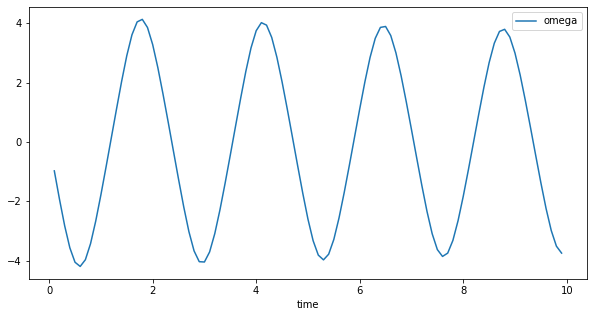

In [326]:

df.iloc[1:100].plot(x='time', y='omega', figsize=(10, 5))

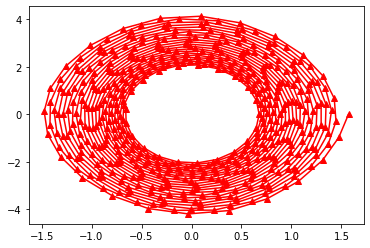

In [325]:
plt.plot(df["theta"].iloc[0:500], df["omega"].iloc[0:500], 'r^-')

<AxesSubplot:xlabel='time'>

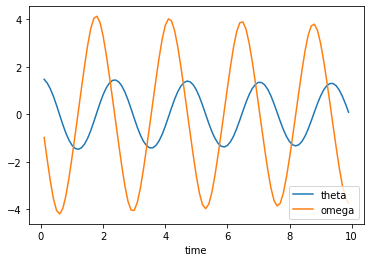

In [322]:
df.iloc[1:100].plot(x='time', y=['theta', 'omega'])

<AxesSubplot:xlabel='theta'>

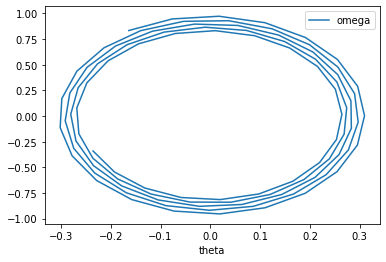

In [315]:
df.iloc[900:1000].plot(x='theta', y = "omega")

# Lagrange polynomial

In [108]:
import numpy as np
from numpy import (array, transpose, searchsorted, atleast_1d, atleast_2d,
                   ravel, poly1d, asarray, intp)

def lagrange(x, w):
    p = poly1d(0.0)
    for j in range(len(x)):
        pt = poly1d(w[j])
        for k in range(len(x)):
            if k == j:
                continue
            fac = x[j]-x[k]
            pt *= np.poly1d([1.0, -x[k]])/fac
        p += pt
    return p


In [135]:
t = np.arange(0, 1000, 0.1)
array_lagrange_theta = [0]
array_lagrange_omega = [0]


In [136]:
from numpy.polynomial.polynomial import Polynomial
for i in range(0,999):
    if i == 999:
        array_lagrange_theta.append(0)
        array_lagrange_omega.append(0)
    else :
        x_current = [t[i-1], t[i], t[i+1]]
        theta_current = [y[i-1][0], y[i][0], y[i+1][0]]
        omega_current = [y[i-1][1], y[i][1], y[i+1][1]]
        array_lagrange_theta.append(Polynomial(lagrange(x_current, theta_current)).coef)
        array_lagrange_omega.append(Polynomial(lagrange(x_current, omega_current)).coef)
   

In [134]:
print(len(array_lagrange_omega))

2998


In [137]:
df["poly of theta"] = array_lagrange_theta
df["poly of omega"] = array_lagrange_omega

In [206]:

def is_solution_check(coef,t_n,t_np1):
    a = np.polyval(coef, t_n) + np.pi/3
    b = np.polyval(coef, t_np1) + np.pi/3
    if (a*b > 0):
        return False
    else :
        return True

# Finding root of lagrange polynomial

In [207]:
for i in range (1, 1000):
    if(is_solution_check(array_lagrange_theta[i], t[i],t[i+1])):
        print(array_lagrange_theta[i])
        print(t[i])
        print(i)
        break

[ 1.89734519 -6.46641192  3.16522431]
0.8
8


In [208]:
def func(t):
    return np.polyval(array_lagrange_theta[9], t) + np.pi/3

In [217]:
def bisection_method(func, low, high, tolerance=1e-6, max_iterations=1000):

    for _ in range(max_iterations):
        midpoint = (low + high) / 2
        f_mid = func(midpoint)
        if abs(f_mid) < tolerance:
            return midpoint
        elif func(low) * f_mid < 0:
            high = midpoint
        else:
            low = midpoint

    return (low + high) / 2


# Define your interval [tn, tn_plus_1] and alpha_obst
tn = 0.8  # define this
tn_plus_1 = 0.9  # define this

# Find the root using the bisection method
tobst = bisection_method(func, tn, tn_plus_1)

if tobst is not None:
    print("The solution tobst is:", tobst)
else:
    print("No solution found in the interval.")


The solution tobst is: 0.8772171020507813


In [219]:
 np.polyval(array_lagrange_theta[8], 0.877) + np.pi/3

0.0006818102321191066

In [212]:
from scipy.optimize import brentq
def func(t):
    return np.polyval(array_lagrange_theta[8], t) + np.pi/3

t_obst = brentq(func, 0.8, 0.9)
print(t_obst)

0.8772172715160461


In [213]:
theta_obstacle = -np.pi/3
omega_obstacle = np.polyval(array_lagrange_omega[8],tobst)
print(omega_obstacle)

-2.737292617053246


# Restarting the integration

In [223]:
theta_new_0 = -np.pi /3  # Initial angle
omega_new_0 = -omega_obstacle # Initial angular velocity
h = 0.1
y_new = np.zeros((1000, 2))
y_new[0][0] = theta_new_0
y_new[0][1] = omega_new_0
print(y_new[0][0])
print(y_new[0][1])

-1.0471975511965976
2.737292617053246


In [224]:
def Jacobian_Euler(y_new):
    g = 9.81
    h = 0.1
    l = 1.0
    return np.array([
    [-1, h],
    [-h * (g / l) * np.cos(y_new[0]), -1]])

In [225]:
def negative(y):
    x = []
    for j in y:
        if j != 0:
            x.append(-j)
        else :
            x.append(0)
    return x
            

In [226]:
def F_Euler_new(y_new, guess):

    g = 9.81
    h = 0.1
    l = 1.0
    
    theta_0 = y_new[0][0]
    omega_0 = y_new[0][1]
    
    theta_1, omega_1 = guess[0], guess[1]
    eq1 = theta_0 + h * omega_1 - theta_1
    eq2 = omega_0 - h * (g / l) * np.sin(theta_1) - omega_1
    return [eq1, eq2]

In [227]:

def Newton_system_Euler(y_new,guess): 
    F_value = F_Euler_new(y_new,guess)
    eps = 1e-7
    F_norm = np.linalg.norm(F_value, ord=2)  # l2 norm of vector
    iteration_counter = 0
    while abs(F_norm) > eps and iteration_counter < 100:
        
        delta = np.linalg.solve(Jacobian_Euler(guess), negative(F_value))
        guess = guess + delta
        F_value = F_Euler(y_new, guess)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter += 1
       

    # Here, either a solution is found, or too many iterations
    if abs(F_norm) > eps:
        iteration_counter = -1
    theta_1, omega_1 = guess[0], guess[1]
    return theta_1, omega_1


In [229]:
theta_new_1, omega_new_1 = Newton_system_Euler(y_new,[theta_new_0 + h * omega_new_0,omega_new_0])
y_new[1][0] = theta_new_1
y_new[1][1] = omega_new_1
print(y_new[1][0],y_new[1][1])

-0.7095564037945838 3.3764114740201383


# Restarting integration usign BDF-2

In [230]:
def F_BDF_2_new(i,y_new,guess):
    
    g = 9.81
    h = 0.1
    l = 1.0
    theta_np1, omega_np1 = guess[0], guess[1]
    #Newton_system_ImplicitEuler(y)
    f1 = -theta_np1 + (4/3)*y_new[i][0] - (1/3)*y_new[i-1][0] + (2/3)*h * omega_np1
    f2 = -omega_np1 + (4/3)*y_new[i][1] - (1/3)*y_new[i-1][1] - (2/3)*h * (g / l) * np.sin(theta_np1)
    return [f1, f2]


In [231]:
def Jacobian_BDF_2(y_new):
    g = 9.81
    h = 0.1
    l = 1.0
    return np.array([[-1, (2/3)*h],
                      [-(2/3)*h*(g/l)*np.cos(y_new[0]), -1]])

In [232]:
def Newton_system_BDF(y_new,guess):
    """
    Solve nonlinear system F=0 by Newton's method.
    J is the Jacobian of F. Both F and J must be functions of x.
    At input, x holds the start value. The iteration continues
    until ||F|| < eps.
    """
    eps = 1e-6
    F_value = F_BDF_2_new(i,y_new,guess)
    F_norm = np.linalg.norm(F_value, ord=2)  # l2 norm of vector
    iteration_counter = 0  
    while abs(F_norm) > eps and iteration_counter < 1000:
        delta = np.linalg.solve(Jacobian_BDF_2(guess),negative(F_value))
        guess = guess + delta
        F_value = F_BDF_2_new(i,y_new,guess)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter += 1

    # Here, either a solution is found, or too many iterations
    if abs(F_norm) > eps:
        iteration_counter = -1
    theta_np1, omega_np1 = guess[0], guess[1]
    return theta_np1, omega_np1


In [233]:
for i in range(1,1000):
    theta, omega = Newton_system_BDF(y_new, [y_new[i-1][0]+ h * y_new[i-1][1],y_new[i-1][1]])
    y_new[i+1][0] = theta
    y_new[i+1][1] = omega
    print(y_new[i+1][0],y_new[i+1][1])

-0.3430473486001242 3.8094300909068246
0.0409232232811917 3.927013302247441
0.41571947607387416 3.702090932483657
0.7526552770476246 3.180055750642844
1.0280360481862254 2.44603256221026
1.2255594495324236 1.585947164499969
1.3356175753717923 0.6632548808595417
1.353442181757933 -0.2829215334047335
1.2777548171867779 -1.224433500498028
1.110904311402543 -2.124320763907746
0.8606092922823353 -2.920172757881938
0.5423111001430756 -3.522997786487856
0.1801374783599429 -3.8411133660506915
-0.19527072122835043 -3.8202548849087368
-0.5517719277298889 -3.470477099581611
-0.8611240551872893 -2.8577758793533135
-1.1022433213699379 -2.0700283554527275
-1.2615806358942268 -1.184463386951089
-1.3316192285599917 -0.2538923173650307
-1.309096731342245 0.688030421595024
-1.1942436272990817 1.6101840745587137
-0.9916316071228632 2.4649147824274613
-0.7122773764146791 3.177253359741669
-0.3755219833072112 3.654559743071099
-0.008648970357442706 3.819318228709189
0.3567001266180432 3.6458713898834456
0.

IndexError: index 1000 is out of bounds for axis 0 with size 1000

In [234]:
df_new = pd.DataFrame(y_new, columns =['theta_new', 'omega_new']) 

,theta_new,omega_new
0,-1.047198,2.737293
1,-0.709556,3.376411
2,-0.343047,3.809430
3,0.040923,3.927013
4,0.415719,3.702091
...,...,...
995,0.063714,-0.701289
996,-0.006240,-0.727384
997,-0.075348,-0.686852
998,-0.137306,-0.583825


In [239]:
df_new['time'] = pd.Series(pd.np.arange(t_obst, 992, 0.1))

C:\Users\admin\AppData\Local\Temp/ipykernel_20008/1725456872.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df_new['time'] = pd.Series(pd.np.arange(t_obst, 992, 0.1))


In [241]:
df['time'] = pd.Series(pd.np.arange(0, 1000, 0.1))

C:\Users\admin\AppData\Local\Temp/ipykernel_20008/3596480760.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['time'] = pd.Series(pd.np.arange(0, 1000, 0.1))


,theta_new,omega_new,time
0,-1.047198,2.737293,0.877217
1,-0.709556,3.376411,0.977217
2,-0.343047,3.809430,1.077217
3,0.040923,3.927013,1.177217
4,0.415719,3.702091,1.277217
...,...,...,...
995,0.063714,-0.701289,100.377217
996,-0.006240,-0.727384,100.477217
997,-0.075348,-0.686852,100.577217
998,-0.137306,-0.583825,100.677217


<AxesSubplot:xlabel='time'>

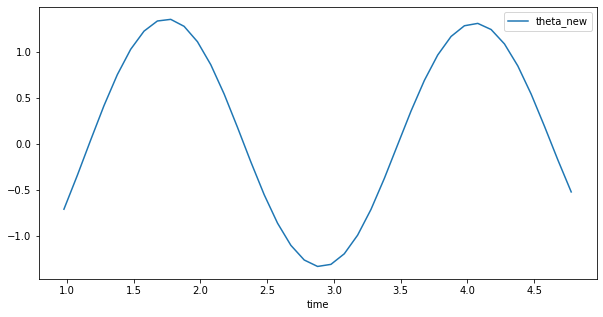

In [285]:
df_new.iloc[1:40].plot(x='time', y='theta_new', figsize=(10, 5))

<AxesSubplot:xlabel='time'>

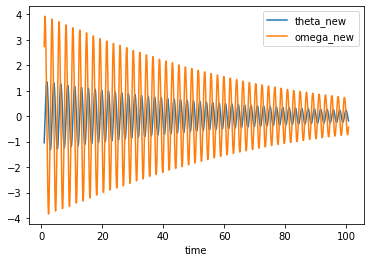

In [245]:
df_new.plot(x='time', y=['theta_new', 'omega_new'])

<AxesSubplot:xlabel='theta'>

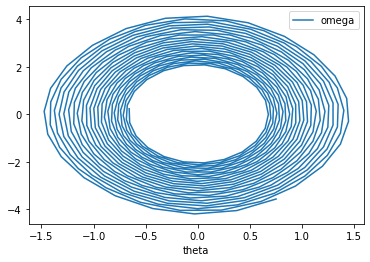

In [251]:
df.iloc[4:500].plot(x='theta', y= 'omega')

In [329]:
df.head(10)

,theta,omega,time
0,1.570796,0.000000,0.0
1,1.473164,-0.976328,0.1
2,1.311690,-1.933940,0.2
3,1.069422,-2.826651,0.3
4,0.750644,-3.570322,0.4
5,0.373913,-4.057092,0.5
6,-0.031578,-4.198701,0.6
7,-0.431564,-3.972340,0.7
8,-0.793604,-3.430660,0.8
9,-1.092255,-2.669565,0.9


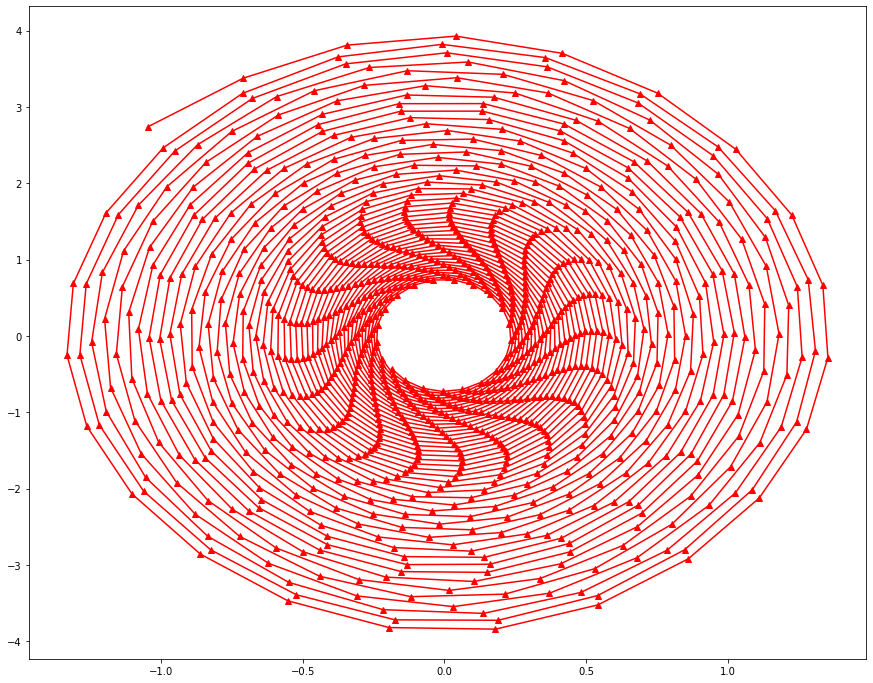

In [298]:
plt.figure(figsize=(15,12))
plt.plot(df_new["theta_new"], df_new["omega_new"], 'r^-')

In [335]:
df_new.rename(columns = {'omega_new':'omega'}, inplace = True)
df_new

,theta,omega,time
0,-1.047198,2.737293,0.877217
1,-0.709556,3.376411,0.977217
2,-0.343047,3.809430,1.077217
3,0.040923,3.927013,1.177217
4,0.415719,3.702091,1.277217
...,...,...,...
995,0.063714,-0.701289,100.377217
996,-0.006240,-0.727384,100.477217
997,-0.075348,-0.686852,100.577217
998,-0.137306,-0.583825,100.677217


In [260]:
from pylab import *

In [269]:
len(df.time)

1000

In [330]:
df_collision = df.iloc[0:9]

In [336]:
concatenated_df = pd.concat([df_collision, df_new])

<AxesSubplot:xlabel='theta'>

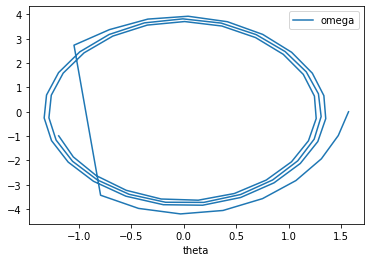

In [346]:
concatenated_df.reset_index(drop=True, inplace=True)
concatenated_df.iloc[0:75].plot(x = "theta", y = "omega")

<AxesSubplot:xlabel='theta'>

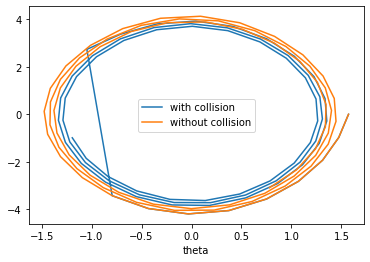

In [352]:
ax = concatenated_df.iloc[0:75].plot(x = "theta", y = "omega", label='with collision')
df.iloc[0:75].plot(x = "theta", y = "omega", label='without collision', ax = ax)